In [3]:
import numpy as np
from matplotlib import pyplot as plt

# Teoria

## Kwadratury złożone

### 1. Trapezu
$$
S\left(f\right)=\frac{h}{2}\sum\limits_{j=0}^{N-1}\left(f\left(c_j\right)+f\left(c_{j+1}\right)\right)=h\sum\limits_{j=0}^N f\left(c_j\right)-\frac{h}{2}\left(f\left(c_0\right)+f\left(c_N\right)\right)
$$

### 2. Simpsona (paraboli)
$$
S\left(f\right)=\frac{h}{3}\sum\limits_{j=0}^{N-1}\left(f\left(c_j\right)+4f\left(c_{j+\frac{1}{2}}\right)+f\left(c_{j+1}\right)\right)
$$

## Oszacowanie błędu dla kwadratur prostych

### 1.Kwadratura trapezu
$$E\left(f\right)\leq\frac{1}{12}h^3\max\limits_{x\in\left(a,b\right)}\left|f''\left(x\right)\right|,$$
gdzie $h=b-a$.


### 2.Kwadratura Simpsona (paraboli)
$$E\left(f\right)\leq\frac{1}{90}h^5\max\limits_{x\in\left(a,b\right)}\left|f^{(4)}\left(x\right)\right|,$$
gdzie $h=\frac{b-a}{2}$.

## Oszacowanie błędu dla kwadratur złożonych
Błędy te są szacowane ze wzorem podanym na wykładzie: 
$$
E\left(f\right)\leq C\left(f\right)\,\frac{b-a}{n}\,h^{r-1}.
$$

### 1.Kwadratura trapezu 
$$
E\left(f\right)\leq\frac{1}{12}\frac{b-a}{1}h^2\max\limits_{x\in\left(a,b\right)}\left|f''\left(x\right)\right|,
$$
gdzie $h=\frac{b-a}{N}$.


### 2.Kwadratura Simpsona (paraboli)
$$E\left(f\right)\leq\frac{1}{90}\frac{b-a}{2}h^4\max\limits_{x\in\left(a,b\right)}\left|f^{(4)}\left(x\right)\right|,$$
gdzie $h=\frac{b-a}{2N}$.

# Zadanie 4.

Rozważ całkę 
$$
\int\limits_0^1{\rm{e}}^x {\rm{d}}x.
$$
Znajdź minimalną liczbę $n$ podprzedziałów, która jest potrzebna dla obliczenia tej całki z błędem bezwzględnym $\leq 5 \cdot 10^{−4}$ używając złożonych metod trapezów i Simpsona. W obu przypadkach porównaj otrzymany błąd z błędem teoretycznym.

### Wartość dokładna
Możemy wyznaczyć wartość dokładną tej całki dla późniejszego wykorzystania do sprawdzenia oszacowania błędu.

$$
\int\limits_0^1{\rm{e}}^x {\rm{d}}x={{\rm{e}}^x}\vert_0^1={\rm{e}}^1-{\rm{e}}^0={\rm{e}}-1.
$$

In [4]:
I = np.e-1

### Kwadratura Trapezu

#### N wyznaczone z teoretycznego oszacowania błędu

Chcemy, aby błąd bezwzględny złożonej kwadratury trapezu był niewiększy niż $5\cdot 10^{-4}.$ Zatem korzystając ze znanego oszacowania możemy zapisać
$$
E\left(f\right)\leq\frac{1}{12}\frac{b-a}{1}h^2\max\limits_{x\in\left(a,b\right)}\left|f''\left(x\right)\right|\leq 5\cdot 10^{-4},
$$
gdzie $h=\frac{b-a}{N}.$

\begin{aligned}
\frac{1}{12}\frac{b-a}{1}h^2\max\limits_{x\in\left(a,b\right)}\left|f''\left(x\right)\right|&\leq 5\cdot 10^{-4}\\
\frac{1}{12}\frac{b-a}{1}{\left(\frac{b-a}{N}\right)}^2\max\limits_{x\in\left(a,b\right)}\left|f''\left(x\right)\right|&\leq 5\cdot 10^{-4}\\
{\left(\frac{1}{N}\right)}^2&\leq 12\cdot \frac{1}{{\left(b-a\right)}^3\max\limits_{x\in\left(a,b\right)}\left|f''\left(x\right)\right|} 5\cdot 10^{-4}\\
\frac{{\left(b-a\right)}^3\max\limits_{x\in\left(a,b\right)}\left|f''\left(x\right)\right|}{12\cdot 5\cdot 10^{-4}}&\leq N^2
\end{aligned}


Interesuje nas tylko $N$ dodatnie zatem możemy zapisać

$$
N \geq \sqrt{\frac{{\left(b-a\right)}^3\max\limits_{x\in\left(a,b\right)}\left|f''\left(x\right)\right|}{12\cdot 5\cdot 10^{-4}}}.
$$

Całka jest na przedziale $\left[0,1\right]$ z funkcji $f\left(x\right)=\rm{e}^x$.
Kolejne pochodne $f$ są równe $f$, zatem 

$$
\max\limits_{x\in\left(a,b\right)}\left|f''\left(x\right)\right|
=\max\limits_{x\in\left(0,1\right)}\left|{\rm{e}}^x\right|={\rm{e}}.
$$

Ostatecznie otrzymujemy

$$
N \geq \sqrt{\frac{{\left(1-0\right)}^3{\rm{e}}}{12\cdot 5\cdot 10^{-4}}}
= \sqrt{\frac{{\rm{e}}}{6\cdot 10^{-3}}}.
$$

In [5]:
np.sqrt(np.e/6/10**(-3))

21.28490007986509

Jako że $N\in\mathbb{Z}$, to minimalne $N$ takie, że błąd bezwzględny na pewno jest niewiększy niż $5\cdot 10^{-4},$ wynosi $22$.

In [6]:
def zl_trap(a,b,f,N):
    """
    Calculate composite trapezoidal rule
    
    @par a: (int,float) start of the range of integral
    @par b: (int,float) end of the range of integral
    @par f: (function) function that the intergal is calculated from
    @par N: (int,float) amount of equally spaced panels
    return: (float) composite trapezoidal rule
    """
    h = (b-a)/N
    c = np.linspace(a,b,N+1)
    return h/2*sum(f(c[i])+f(c[i+1]) for i in range(N))

In [7]:
S_T = zl_trap(0,1,np.exp,22)
S_T

1.7185776656942175

Wartość całki przybliżona przy pomocy złożonej kwadratury trapezu wynosi 

$$S\left(f\right)\approx 1.71857767.$$

Wartość błędu bezwzględnego wyznaczmy jako $E\left(f\right)=\left|I\left(f\right)-S\left(f\right)\right|=\left|{\rm{e}}-1-S\left(f\right)\right|$

In [8]:
E_T = abs(I-S_T)
E_T

0.0002958372351724581

In [9]:
E_T<=5*10**(-4)

True

Błąd teoretyczny dla $N=22$ wynosi

In [10]:
1/12/22**2*np.e

0.0004680237307952901

In [11]:
1/12/22**2*np.e<=5*10**(-4)

True

#### N wyznaczone numerycznie

In [12]:
N=0
e=1
while e>(5*10**(-4)):
    N += 1
    s = zl_trap(0,1,np.exp,N)
    e = abs(s-I)
N   

17

In [13]:
S_T1 = zl_trap(0,1,np.exp,17)
S_T1

1.7187772675429815

Wartość całki przybliżona przy pomocy złożonej kwadratury trapezu wynosi 

$$S\left(f\right)\approx 1.7187772675.$$

Wartość błędu bezwzględnego wynosi

In [14]:
E_T1 = abs(I-S_T1)
E_T1

0.0004954390839364553

In [15]:
E_T1<=5*10**(-4)

True

Błąd teoretyczny dla $N=17$ wynosi

In [16]:
1/12/17**2*np.e

0.0007838182896364029

In [17]:
1/12/17**2*np.e<=5*10**(-4)

False

### Porównanie wartości przybliżeń i ich błędów 
dla różnych wartości $N$.

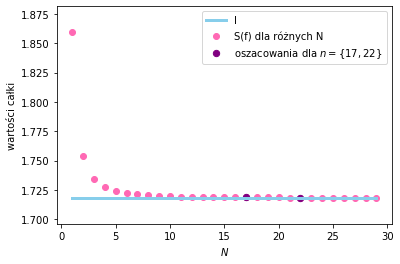

In [18]:
x = range(1,30)
y = [zl_trap(0,1,np.exp,i) for i in x]
plt.scatter(x,y, color='hotpink', label='S(f) dla różnych N')
plt.plot(x, [I for i in x], color='skyblue', label='I', linewidth=3)
plt.scatter([17,22],[y[x.index(17)],y[x.index(22)]], color='purple', label='oszacowania dla $n=\{17,22\}$', s=40)
plt.xlabel('$N$')
plt.ylabel('wartości całki')
plt.legend()
plt.show()

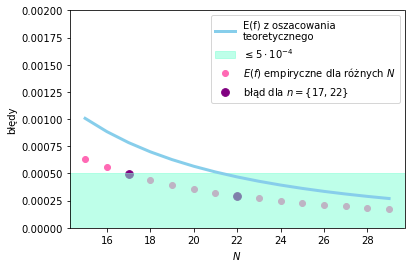

In [19]:
x = range(15,30)
y = [zl_trap(0,1,np.exp,i)-I for i in x]
plt.scatter(x,y, color='hotpink', label='$E(f)$ empiryczne dla różnych $N$')
plt.plot(x, [1/12/i**2*np.e for i in x], color='skyblue', label='E(f) z oszacowania \nteoretycznego', linewidth=3)
plt.axhspan(0, 5*10**(-4), color='aquamarine', label='$\leq 5\cdot 10^{-4}$', alpha=0.5)
plt.scatter([17,22],[y[x.index(17)],y[x.index(22)]], color='purple', label='błąd dla $n=\{17,22\}$', s=60)
plt.xlabel('$N$')
plt.ylabel('błędy')
plt.ylim([0,0.002])
plt.legend()
plt.show()

$N$ z metody numerycznej możemy uzyskać jedynie, gdy możemy policzyć daną całkę analitycznie. W innym przypadku musimy się posłużyć teoretycznym oszacowaniem błędu.

### Kwadratura Simpsona

#### N wyznaczone z teoretycznego oszacowania błędu

Chcemy, aby błąd bezwzględny złożonej kwadratury Simpsona był niewiększy niż $5\cdot 10^{-4}.$ Zatem korzystając ze znanego oszacowania możemy zapisać
$$
E\left(f\right)\leq\frac{1}{90}\frac{b-a}{2}h^4\max\limits_{x\in\left(a,b\right)}\left|f^{\left(4\right)}\left(x\right)\right|\leq 5\cdot 10^{-4},
$$
gdzie $h=\frac{b-a}{2N}.$

Analogicznie jak dla złożonej kwadratury trapezu możemy wyznaczyć

$$
N \geq \sqrt[4]{\frac{{\left(b-a\right)}^5\max\limits_{x\in\left(a,b\right)}\left|f^{\left(4\right)}\left(x\right)\right|}{2^5\cdot 90\cdot 5\cdot 10^{-4}}}.
$$

In [20]:
2**5*90*5/10**4

1.44

Ostatecznie otrzymujemy

$$
N \geq \sqrt[4]{\frac{{\left(1-0\right)}^5{\rm{e}}}{2^5\cdot90\cdot 5\cdot 10^{-4}}}
=\sqrt[4]{\frac{{\rm{e}}}{1.44}}
$$

In [21]:
(np.e/1.44)**(1/4)

1.1721494752164106

Jako że $N\in\mathbb{Z}$, to minimalne $N$ takie, że błąd bezwzględny na pewno jest niewiększy niż $5\cdot 10^{-4},$ wynosi $2$.

In [22]:
def zl_simp(a,b,f,N):
    """
    Calculate composite Simpson's rule
    
    @par a: (int,float) start of the range of integral
    @par b: (int,float) end of the range of integral
    @par f: (function) function that the intergal is calculated from
    @par N: (int,float) amount of equally spaced panels
    return: (float) composite Simpson's rule
    """
    h = (b-a)/N/2
    c = np.linspace(a,b,N+1)
    return h/3*sum(f(c[i])+4*f((c[i]+c[i+1])/2)+f(c[i+1]) for i in range(N))

In [23]:
S_S = zl_simp(0,1,np.exp,2)
S_S

1.718318841921747

Wartość całki przybliżona przy pomocy złożonej kwadratury Simpsona wynosi 

$$S\left(f\right)\approx 1.71831884.$$

Wartość błędu bezwzględnego wyznaczmy jako $E\left(f\right)=\left|I\left(f\right)-S\left(f\right)\right|=\left|{\rm{e}}-1-S\left(f\right)\right|$

In [24]:
E_S = abs(I-S_S)
E_S

3.7013462701906974e-05

In [25]:
E_S<=5*10**(-4)

True

Błąd teoretyczny dla $N=2$ wynosi

In [26]:
1/90/2/(2*2)**4*np.e

5.8990491068989694e-05

In [27]:
1/90/2/(2*2)**4*np.e<=5*10**(-4)

True

#### N wyznaczone numerycznie

In [28]:
N=0
e=1
while e>(5*10**(-4)):
    N += 1
    s = zl_simp(0,1,np.exp,N)
    e = abs(s-I)
N   

2

$N$ wyszło takie samo jak z teoretycznego oszacowania.

<b>Dodatkowo można rozważyć inne oszacowanie błędu:</b>
$$E\left(f\right)\leq\frac{1}{12}\frac{b-a}{2}h^3\max\limits_{x\in\left(a,b\right)}\left|f^{\left(3\right)}\left(x\right)\right|.$$

Wtedy otrzymujemy

$$
N \geq \sqrt[3]{\frac{{\left(1-0\right)}^4{\rm{e}}}{2^4\cdot12\cdot 5\cdot 10^{-4}}}
=\sqrt[3]{\frac{{\rm{e}}}{0.096}}
$$

In [29]:
2**4*12*5/10**4

0.096

In [30]:
(np.e/(0.096))**(1/3)

3.0479493772461477

Jako że $N\in\mathbb{Z}$, to minimalne $N$ takie, że błąd bezwzględny na pewno jest niewiększy niż $5\cdot 10^{-4},$ wynosi $4$.

In [39]:
S_S1 = zl_simp(0,1,np.exp,4)
S_S1

1.718284154699897

Wartość całki przybliżona przy pomocy złożonej kwadratury Simpsona wynosi 

$$S\left(f\right)\approx 1.7182841547.$$

Wartość błędu bezwzględnego wynosi

In [40]:
E_S1 = abs(I-S_S1)
E_S1

2.3262408519464373e-06

In [41]:
E_S1<=5*10**(-4)

True

Błąd teoretyczny dla $N=4$ wynosi

In [42]:
1/12/2/(2*4)**3*np.e

0.00022121434150871135

In [43]:
1/12/2/(2*4)**3*np.e<=5*10**(-4)

True

### Porównanie wartości przybliżeń i ich błędów 
dla różnych wartości $N$.

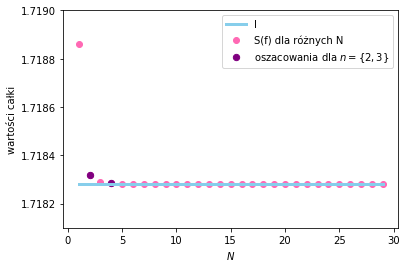

In [46]:
x = range(1,30)
y = [zl_simp(0,1,np.exp,i) for i in x]
plt.scatter(x,y, color='hotpink', label='S(f) dla różnych N')
plt.plot(x, [I for i in x], color='skyblue', label='I', linewidth=3)
plt.scatter([2,4],[y[x.index(2)],y[x.index(4)]], color='purple', label='oszacowania dla $n=\{2,3\}$', s=40)
plt.xlabel('$N$')
plt.ylabel('wartości całki')
plt.ylim([1.7181,1.719])
plt.legend()
plt.show()

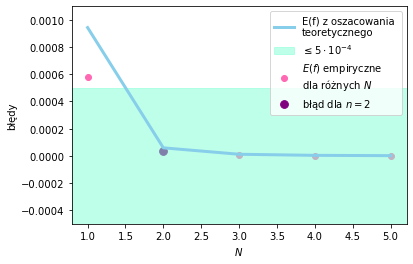

In [47]:
x = range(1,6)
y = [zl_simp(0,1,np.exp,i)-I for i in x]
plt.scatter(x,y, color='hotpink', label='$E(f)$ empiryczne \ndla różnych $N$')
plt.plot(x, [1/90/(2*i)**4*np.e/2 for i in x], color='skyblue', label='E(f) z oszacowania \nteoretycznego', linewidth=3)
plt.axhspan(-0.005, 5*10**(-4), color='aquamarine', label='$\leq 5\cdot 10^{-4}$', alpha=0.5)
plt.scatter(2,y[x.index(2)], color='purple', label='błąd dla $n=2$', s=60)
plt.xlabel('$N$')
plt.ylabel('błędy')
plt.ylim([-0.0005,0.0011])
plt.legend()
plt.show()

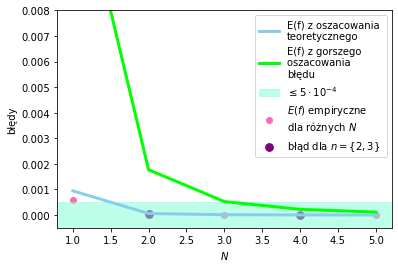

In [48]:
x = range(1,6)
y = [zl_simp(0,1,np.exp,i)-I for i in x]
plt.scatter(x,y, color='hotpink', label='$E(f)$ empiryczne \ndla różnych $N$')
plt.plot(x, [1/90/(2*i)**4*np.e/2 for i in x], color='skyblue', label='E(f) z oszacowania \nteoretycznego', linewidth=3)
plt.plot(x, [1/12/(2*i)**3*np.e/2 for i in x], color='lime', label='E(f) z gorszego \noszacowania \nbłędu', linewidth=3)
plt.axhspan(-0.005, 5*10**(-4), color='aquamarine', label='$\leq 5\cdot 10^{-4}$', alpha=0.5)
plt.scatter([2,4],[y[x.index(2)],y[x.index(4)]], color='purple', label='błąd dla $n=\{2,3\}$', s=60)
plt.xlabel('$N$')
plt.ylabel('błędy')
plt.ylim([-0.0005,0.008])
plt.legend()
plt.show()